# Linear Regression

1. Import libraries - pandas, sklearn.
2. Read the dataset.
3. Split the dataset into train and test.
4. Train the model using training data.
5. Test the model using test data.
6. Evaluate the model.

Dataset used : https://www.kaggle.com/mirichoi0218/insurance

In [1]:
# preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# model imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
changed_labels = []

changed_labels.append(pd.factorize(insurance_data['sex'])[1])
insurance_data['sex'] = pd.factorize(insurance_data['sex'])[0]

changed_labels.append(pd.factorize(insurance_data['smoker'])[1])
insurance_data['smoker'] = pd.factorize(insurance_data['smoker'])[0]

changed_labels.append(pd.factorize(insurance_data['region'])[1])
insurance_data['region'] = pd.factorize(insurance_data['region'])[0]

print(changed_labels)
insurance_data

[Index(['female', 'male'], dtype='object'), Index(['yes', 'no'], dtype='object'), Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')]


age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       0       0  16884.92400
1      18    1  33.770         1       1       1   1725.55230
2      28    1  33.000         3       1       1   4449.46200
3      33    1  22.705         0       1       2  21984.47061
4      32    1  28.880         0       1       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       1       2  10600.54830
1334   18    0  31.920         0       1       3   2205.98080
1335   18    0  36.850         0       1       1   1629.83350
1336   21    0  25.800         0       1       0   2007.94500
1337   61    0  29.070         0       0       2  29141.36030

[1338 rows x 7 columns]

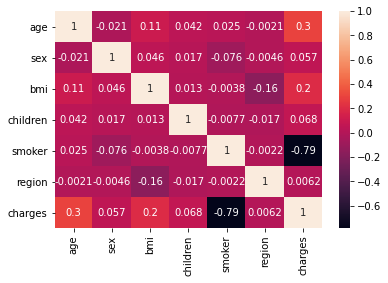

In [4]:
sns.heatmap(insurance_data.corr(), annot=True)
plt.show()

In [5]:
x = insurance_data.drop(columns='charges')
x

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    1  33.770         1       1       1
2      28    1  33.000         3       1       1
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       2
1334   18    0  31.920         0       1       3
1335   18    0  36.850         0       1       1
1336   21    0  25.800         0       1       0
1337   61    0  29.070         0       0       2

[1338 rows x 6 columns]

In [6]:
y = insurance_data['charges'].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

print('Train features  :', x_train.shape)
print('Train labels    :', y_train.shape)
print('\nTest features   :', x_test.shape)
print('Test labels     :', y_test.shape)

Train features  : (1070, 6)
Train labels    : (1070,)

Test features   : (268, 6)
Test labels     : (268,)


In [8]:
model = LinearRegression().fit(x_train, y_train)

In [9]:
y_pred = model.predict(x_test)
y_pred.shape, y_test.shape

((268,), (268,))

In [10]:
pd.DataFrame({'Prediction': y_pred, 'True': y_test})

Prediction         True
0     4243.315613   1826.84300
1     4369.130655  20177.67113
2     8459.055910   7421.19455
3     2915.207396   1877.92940
4    24708.665557  15518.18025
..            ...          ...
263   6480.133546   1984.45330
264  23610.114962  14283.45940
265  14857.574372  14043.47670
266   9955.079471   8825.08600
267  11758.314936  12124.99240

[268 rows x 2 columns]

c:\users\ikath\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


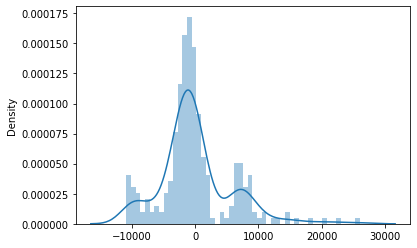

In [11]:
sns.distplot((y_test-y_pred), bins=50)
plt.show()

In [12]:
print('Coefficients\n', (model.coef_))
print('\nMean sqaured error : %.3f' % (mean_squared_error(y_test, y_pred)))
print('\nAccuracy : %.3f %%' % (model.score(x_test, y_test)*100))
print('\nR2 score : %.3f' % (r2_score(y_test, y_pred)))

Coefficients
 [ 2.64023906e+02  1.34329927e+01  3.08710555e+02  4.74615667e+02
 -2.34783078e+04  3.85005527e+02]

Mean sqaured error : 32263849.087

Accuracy : 79.425 %

R2 score : 0.794
